In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings 
warnings.filterwarnings('ignore')

# Melting of Glaciers

Glaciers are melting at a very high speed. According to 3D satellite measurements of all the world's mountain sources, we are losing 31% extra snow that we used to lose 15 years back. Scientists across the world are blaming human activities for this high rate. <br>
Using recent satellite data, scientists are suggesting that we are losing around 300 billion metric tons of ice and snow since 2015.

Melting of glaciers is very big threat. With Causing rise in sea level, thier loss will also impact supplies of fresh water. There are many threats that can cause human life :
1. In India, we get much of the late-summer river flow volume that rely's on glacier melt water.
2. Across the world, Glacier meltdown drives Hydropower plants.
3. Throughout centriues, Farmers living in Rhone valley of switzerland have relied on water through glacier meltdown for irrigation of crops. 

There are hundred of threats that are suggested by scientists over the year. <br>


We will be using some datasets from this source: https://climate.nasa.gov/vital-signs/ice-sheets/ <br>
We'll try to extract some relevant data from the above mentioned datasets

Firstly, we are cleaning this dataset.<br>
We'll use two datasets here:
1. First one is for <b>Antartica glacier</b>.
2. Second one is for <b>Greenland glacier</b>.

We'll be finding that how much mass(snow and ice) we're losing per year since 2002.   

In [28]:
antarctica_glacier = pd.read_csv('../datasets/raw-datasets/antarctica_mass_200204_202108.csv',error_bad_lines=False)
antarctica_glacier = antarctica_glacier[22:221]
antarctica_glacier[['Year', 'B']] = antarctica_glacier['HDR Antarctica Mass'].str.split(' ', 1, expand=True)
antarctica_glacier.drop('HDR Antarctica Mass',axis=1,inplace=True)
antarctica_glacier[['Loss of Mass(billion metric tons per year)','c']]=antarctica_glacier['B'].str.split('.', 1, expand=True)
antarctica_glacier.drop('B',axis=1,inplace=True)
antarctica_glacier.drop('c',axis=1,inplace=True)
antarctica_glacier[['Year','c']]=antarctica_glacier['Year'].str.split('.', 1, expand=True)
antarctica_glacier.drop('c',axis=1,inplace=True)
antarctica_glacier['Loss of Mass(billion metric tons per year)'] = antarctica_glacier['Loss of Mass(billion metric tons per year)'].astype(float)
antarctica_glacier = antarctica_glacier.groupby(['Year'], as_index=False).mean()
antarctica_glacier['Loss of Mass(billion metric tons per year)'] = -antarctica_glacier['Loss of Mass(billion metric tons per year)']
antarctica_glacier.to_csv('../datasets/cleaned-datasets/cleaned_antarctica_mass_200204_202108.csv')
antarctica_glacier

b'Skipping line 12: expected 1 fields, saw 8\nSkipping line 13: expected 1 fields, saw 5\nSkipping line 16: expected 1 fields, saw 7\nSkipping line 17: expected 1 fields, saw 5\nSkipping line 24: expected 1 fields, saw 3\nSkipping line 25: expected 1 fields, saw 4\nSkipping line 27: expected 1 fields, saw 2\nSkipping line 29: expected 1 fields, saw 4\n'


,Year,Loss of Mass(billion metric tons per year)
0,2002,2.714286
1,2003,109.818182
2,2004,256.333333
3,2005,223.500000
4,2006,124.666667
5,2007,310.833333
6,2008,581.500000
7,2009,557.500000
8,2010,835.833333
9,2011,932.555556


In [29]:
greenland_glacier = pd.read_csv('../datasets/raw-datasets/greenland_mass_200204_202108.csv',error_bad_lines=False)
greenland_glacier = greenland_glacier[22:221]
greenland_glacier[['Year', 'B']] = greenland_glacier['HDR Greenland Mass'].str.split(' ', 1, expand=True)
greenland_glacier.drop('HDR Greenland Mass',axis=1,inplace=True)
greenland_glacier[['Loss of Mass(billion metric tons per year)','c']]=greenland_glacier['B'].str.split('.', 1, expand=True)
greenland_glacier.drop('B',axis=1,inplace=True)
greenland_glacier.drop('c',axis=1,inplace=True)
greenland_glacier[['Year','c']]=greenland_glacier['Year'].str.split('.', 1, expand=True)
greenland_glacier.drop('c',axis=1,inplace=True)
greenland_glacier['Loss of Mass(billion metric tons per year)'] = greenland_glacier['Loss of Mass(billion metric tons per year)'].astype(float)
greenland_glacier = greenland_glacier.groupby(['Year'], as_index=False).mean()
greenland_glacier['Loss of Mass(billion metric tons per year)'] = -greenland_glacier['Loss of Mass(billion metric tons per year)']
greenland_glacier.to_csv('../datasets/cleaned-datasets/cleaned_greenland_mass_200204_202108.csv')
greenland_glacier

b'Skipping line 12: expected 1 fields, saw 8\nSkipping line 13: expected 1 fields, saw 5\nSkipping line 16: expected 1 fields, saw 7\nSkipping line 17: expected 1 fields, saw 5\nSkipping line 24: expected 1 fields, saw 3\nSkipping line 25: expected 1 fields, saw 4\nSkipping line 27: expected 1 fields, saw 3\nSkipping line 29: expected 1 fields, saw 4\n'


,Year,Loss of Mass(billion metric tons per year)
0,2002,143.714286
1,2003,234.818182
2,2004,451.000000
3,2005,663.083333
4,2006,921.916667
5,2007,1197.083333
6,2008,1462.500000
7,2009,1688.750000
8,2010,2069.916667
9,2011,2534.222222


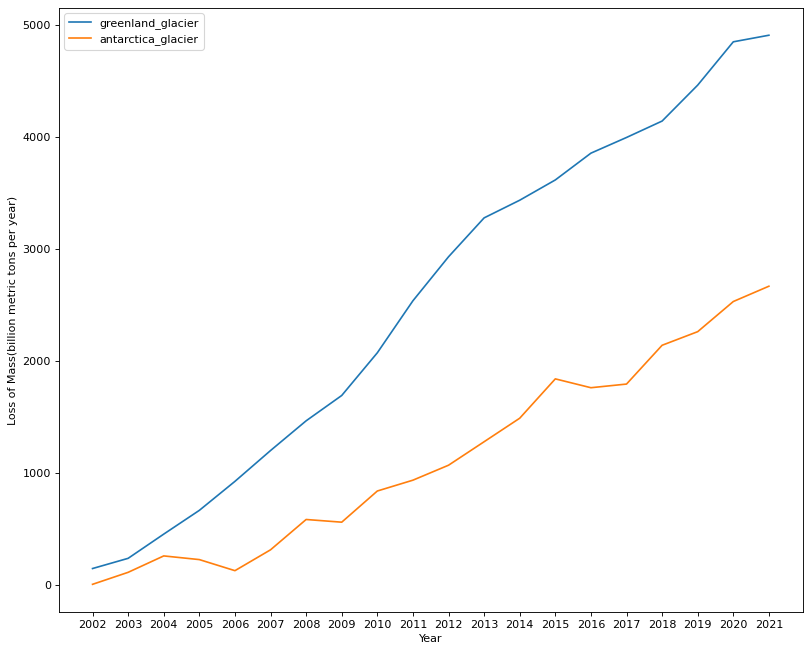

In [30]:
figure(figsize=(12, 10), dpi=80)
plt.plot(greenland_glacier['Year'], greenland_glacier['Loss of Mass(billion metric tons per year)'],label = "greenland_glacier")
plt.plot(antarctica_glacier['Year'], antarctica_glacier['Loss of Mass(billion metric tons per year)'],label = "antarctica_glacier")
plt.legend()
plt.xlabel('Year')
plt.ylabel('Loss of Mass(billion metric tons per year)')
plt.show()

We can clearly observe that we are losing much more glaciers at north than south pole. The reason is that North pole's ice is basically ocean covered by sea ice, whereas Antarctica is an elevated continent covered in more permanent snow & ice.

Now, we'll try to compare the rates at which this loss of mass is occuring yearwise.

In [31]:
antarctica_glacier['Loss per year']=antarctica_glacier['Loss of Mass(billion metric tons per year)'].diff()
greenland_glacier['Loss per year']=greenland_glacier['Loss of Mass(billion metric tons per year)'].diff()
antarctica_glacier

,Year,Loss of Mass(billion metric tons per year),Loss per year
0,2002,2.714286,NaN
1,2003,109.818182,107.103896
2,2004,256.333333,146.515152
3,2005,223.500000,-32.833333
4,2006,124.666667,-98.833333
5,2007,310.833333,186.166667
6,2008,581.500000,270.666667
7,2009,557.500000,-24.000000
8,2010,835.833333,278.333333
9,2011,932.555556,96.722222


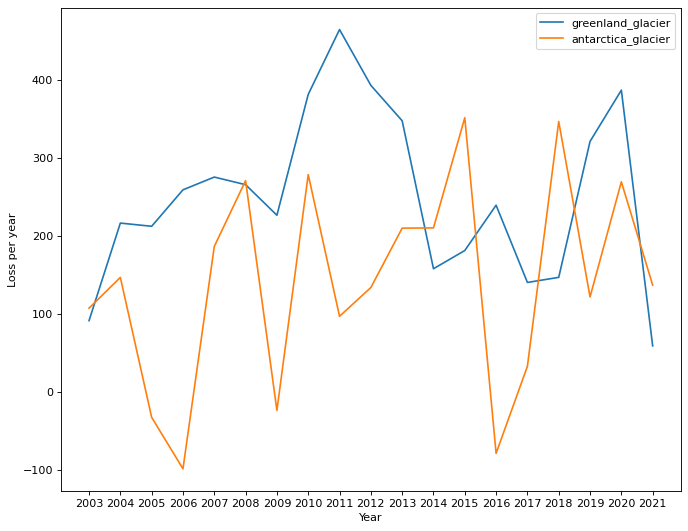

In [32]:
figure(figsize=(10, 8), dpi=80)
plt.plot(greenland_glacier['Year'], greenland_glacier['Loss per year'],label = "greenland_glacier")
plt.plot(antarctica_glacier['Year'], antarctica_glacier['Loss per year'],label = "antarctica_glacier")
plt.legend()
plt.xlabel('Year')
plt.ylabel('Loss per year')
plt.show()

The above figure shows that we are continously losing mass at a very high rate.

It has been observed over years, that almost all glaciers are losing ice , even ones that are in tibet which were clamied to be stable previously. <br>
Shrinking of Glaciers is problem for millions of people living in countries like India who rely on seasonal glacial melt for daily water. The problem is that rapid glacial melt can cause deadly outbreaks. But the biggest threat due to the glacial meltdown is <b>rising sea level</b>. As warm water expands and Melting ice sheets in Greenland and Antarctica(responsible for 21% of sea level rise), the world's ocean are rising.<br>

National Snow and Ice Data Center Director Mark Serreze once said “It’s becoming increasingly clear that <b>sea level rise</b> is going to be a bigger and bigger problem as we move through the 21st century,”. 


# Increases in Global Sea Level Year wise(1880-2019)

Now, As we saw above that Glacier meltdown is a primary reason for sea level rise. we'll do some analysis on the same.

Cleaning of sea-level-fig-1.csv<br>
source:- https://www.epa.gov/climate-indicators/climate-change-indicators-sea-level#ref4

We are considering Sea level in year 1880 as normal sea level.

In [9]:
#cleaning of sea level rise data
sea_rise_data = pd.read_csv("../datasets/raw-datasets/sea-level_fig-1.csv")
sea_rise_data_upto_1992 = sea_rise_data[5:119]
sea_rise_data_upto_1992 = sea_rise_data_upto_1992[['Figure 1. Global Average Absolute Sea Level Change, 1880-2019','Unnamed: 1']].copy()
sea_rise_data_upto_1992.columns = ['Year','Sea Level increase(inches)']
sea_rise_data_from_1993_upto_2019 = sea_rise_data[119:]
sea_rise_data_from_1993_upto_2019 = sea_rise_data_from_1993_upto_2019[['Figure 1. Global Average Absolute Sea Level Change, 1880-2019','Unnamed: 4']].copy()
sea_rise_data_from_1993_upto_2019.columns = ['Year','Sea Level increase(inches)']

In [34]:
sea_rise_data = pd.concat([sea_rise_data_upto_1992, sea_rise_data_from_1993_upto_2019])
sea_rise_data = sea_rise_data[1:]
sea_rise_data.reset_index(inplace=True)
sea_rise_data.drop('index',axis=1,inplace=True)
sea_rise_data['Sea Level increase(inches)']=sea_rise_data['Sea Level increase(inches)'].astype(float)
sea_rise_data['Sea Level increase(cms)']=sea_rise_data['Sea Level increase(inches)']*2.54
sea_rise_data['Rise per year(inches)']=sea_rise_data['Sea Level increase(inches)'].diff()
sea_rise_data['Rise per year(cms)']=sea_rise_data['Sea Level increase(cms)'].diff()
sea_rise_data.to_csv('../datasets/cleaned-datasets/cleaned_sea-level_fig-1.csv')
sea_rise_data

,Year,Sea Level increase(inches),Sea Level increase(cms),Rise per year(inches),Rise per year(cms)
0,1880,0.000000,0.000000,NaN,NaN
1,1881,0.220472,0.560000,0.220472,0.560000
2,1882,-0.440945,-1.120000,-0.661417,-1.680000
3,1883,-0.232283,-0.590000,0.208661,0.530000
4,1884,0.590551,1.500000,0.822835,2.090000
...,...,...,...,...,...
135,2015,8.925435,22.670605,0.345997,0.878833
136,2016,9.036237,22.952043,0.110802,0.281438
137,2017,9.087686,23.082723,0.051449,0.130680
138,2018,9.221200,23.421848,0.133514,0.339125


Now, We'll be doing every 5 year analysis for last 50 year. So that we can check if rate of sea level rise is constant or growing.

we will consider last 35 year data.(1985-2019)

In [35]:
sea_rise_data_last_50_years=sea_rise_data[105:140]
sea_rise_data_last_50_years=sea_rise_data_last_50_years[['Year','Rise per year(cms)']].copy()
N = 5
sea_rise_data_last_50_years=sea_rise_data_last_50_years.groupby(sea_rise_data_last_50_years.index // N).sum()
sea_rise_data_last_50_years['Year']=['1985-1989','1990-1994','1995-1999','2000-2004','2005-2009','2010-2014','2015-2019']
sea_rise_data_last_50_years.reset_index(inplace=True)
sea_rise_data_last_50_years.drop('index',axis=1,inplace=True)
sea_rise_data_last_50_years


,Rise per year(cms),Year
0,0.010000,1985-1989
1,0.714105,1990-1994
2,1.020694,1995-1999
3,1.588062,2000-2004
4,1.289934,2005-2009
5,1.538976,2010-2014
6,2.285729,2015-2019


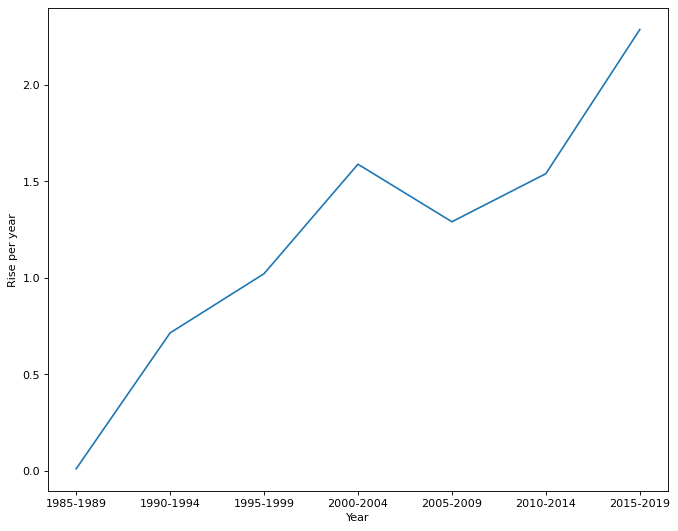

In [36]:
figure(figsize=(10, 8), dpi=80)
plt.plot(sea_rise_data_last_50_years['Year'],sea_rise_data_last_50_years['Rise per year(cms)'])
plt.xlabel('Year')
plt.ylabel('Rise per year')
plt.show()

We can clearly visualize that Sea level is rising at a very high rate. The rate is increasing year by year. If this rate would keep increasing, we may lose 50% of mumbai, cochin, bhavnagar,mangalore, chennai and many more cities by this century.

# References

For glaciers:
1. https://www.nbcnews.com/science/environment/satellites-show-worlds-glaciers-melting-faster-ever-rcna791
2. https://www.fluencecorp.com/how-melting-glaciers-affect-us/
3. https://theconversation.com/climate-explained-why-is-the-arctic-warming-faster-than-other-parts-of-the-world-160614
 

# How Plastic wastes are haunting Oceans?

Rising Sea levels and melting of glaciers are not only problems going in oceans, but they are even more big problems which will affect human and aquactic lives in a very dangerous way.<br>
One of them is Mismanaged Plastic wastes which goes in the oceans through various ways. 

Plastic has now been inesacapable from our daily lives. From food packaging to toiletries, toys, automobiles, electronic devices, plastics are used in everything today. Although plastic is very durable but problem is is unbiodegradeable.<br><br>
Each year, marine animals entangled in plastic wastes generated by us. This causes them infections, injuries, inability to feed and it also limits their motion. When a sea creature consumes these plastic, it can damage their stomach or it may cause infections. In this way, the whole food cycle gets disturbed.<br><br>
Now, when these sea animals consume these plastics, those toxins from plastics breaks inside their bodies. Then human consuming those seafoods are also consuming these toxins. The problem is that some of these toxins are linked to hormonal inabilities and developmental problems. 

# Plastic wastage

Now, Lets look how much plastic is generated by each country every year.

In [37]:
#importing some important libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings 
warnings.filterwarnings('ignore')
import plotly
import plotly.express as px

Cleaning of raw data starts here:

In [38]:
#data cleaning
total_plastic_waste_by_country = pd.read_csv('../datasets/raw-datasets/plastic-waste-generation-total.csv')
total_plastic_waste_by_country.drop('Year',axis=1, inplace=True)
total_plastic_waste_by_country.columns = ['Country','Code','Plastic waste generation (tonnes, total)']
total_plastic_waste_by_country.to_csv('../datasets/cleaned-datasets/cleaned_plastic-waste-generation-total.csv')

population = pd.read_csv("../datasets/raw-datasets/population_by_country_2020.csv", usecols=['Country (or dependency)','Population (2020)'])
population.columns = ['Country','Population']
population.to_csv('../datasets/cleaned-datasets/cleaned_population_by_country_2020.csv')

continent_country = pd.read_excel("../datasets/raw-datasets/countryContinent.xlsx", usecols=['country','code_3','continent'])
continent_country.columns = ['Country','Code','Continent']
continent_country.to_csv('../datasets/cleaned-datasets/cleaned_continent_country.csv')


total_plastic_waste_by_country_population_wise=pd.merge(total_plastic_waste_by_country,population,how='left',left_on=['Country'], right_on = ['Country'])
total_plastic_waste_by_country_population_wise=pd.merge(total_plastic_waste_by_country_population_wise,continent_country,how='left',left_on=['Code'], right_on = ['Code'])
total_plastic_waste_by_country_population_wise.drop('Country_y',axis=1,inplace=True)
total_plastic_waste_by_country_population_wise.columns=['Country','Code','Plastic waste generation (tonnes, total)','Population','Continent']
total_plastic_waste_by_country_population_wise=total_plastic_waste_by_country_population_wise.dropna()
total_plastic_waste_by_country_population_wise['Plastic/Population']=total_plastic_waste_by_country_population_wise['Plastic waste generation (tonnes, total)']/total_plastic_waste_by_country_population_wise['Population']
total_plastic_waste_by_country_population_wise['% share']=(total_plastic_waste_by_country_population_wise['Plastic waste generation (tonnes, total)']*100)/sum(total_plastic_waste_by_country_population_wise['Plastic waste generation (tonnes, total)'])

total_plastic_waste_by_country_population_wise.to_csv('../datasets/cleaned-datasets/total_plastic_waste_by_country_population_wise.csv')
total_plastic_waste_by_country_population_wise

,Country,Code,"Plastic waste generation (tonnes, total)",Population,Continent,Plastic/Population,% share
0,Albania,ALB,73364,2877239.0,Europe,0.025498,0.027044
1,Algeria,DZA,1898343,43984569.0,Africa,0.043159,0.699774
2,Angola,AGO,528843,33032075.0,Africa,0.016010,0.194944
3,Antigua and Barbuda,ATG,22804,98069.0,Americas,0.232530,0.008406
4,Argentina,ARG,2753550,45267449.0,Americas,0.060828,1.015023
...,...,...,...,...,...,...,...
163,Uruguay,URY,310379,3475842.0,Americas,0.089296,0.114413
164,Vanuatu,VUT,25443,308337.0,Oceania,0.082517,0.009379
165,Venezuela,VEN,2669998,28421581.0,Americas,0.093943,0.984224
166,Vietnam,VNM,3268227,97490013.0,Asia,0.033524,1.204745


In [39]:
fig = px.choropleth(total_plastic_waste_by_country_population_wise, 
                    locations='Code', 
                    color='Plastic waste generation (tonnes, total)',
                    color_continuous_scale="reds",
                    range_color=(0,5000000),
                    title='MAP 1: Total plastic waste produced by each country every year',
                    hover_data=['Country']
                   )
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [40]:
fig = px.choropleth(total_plastic_waste_by_country_population_wise, 
                    locations='Code', 
                    color='% share',
                    color_continuous_scale="reds",
                    range_color=(0,10),
                    title='MAP 2: Share of plastic waste produced by each country every year',
                    hover_data=['Country']
                   )
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

From MAP 1 and MAP 2, we can say that China is biggest plastic waste generator(21% of total). 

### Plastic Waste generation vs Population

In [41]:
fig = px.scatter(total_plastic_waste_by_country_population_wise, 
                 x="Population", 
                 y="Plastic waste generation (tonnes, total)", 
                 color="Continent",  
                 hover_data=['Country'],
                 log_x=True,
                 log_y=True,
                 title='PLOT 1: Plastic Waste generation VS Population'
                )

#fig.update_layout(yaxis_range=[0,3000000])
#fig.update_layout(xaxis_range=[1000000,20000000])
fig.update_layout(
    autosize=False,
    width=1000,
    height=700,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="snow",
    plot_bgcolor = 'papayawhip'
)
fig.show()

We can observe from the above scatter plot that as population increases, generation of plastic wastes also increases. So, We can conclude that Population is a big factor that increases plastic wastes.

Now, Apart from Plastic waste generation, there is bigger problem.<br>
Mismanaged plastic wastes are much serious issue than Plastic waste generation because if plastic wastes are mismanaged, they can pollute oceans, rivers and land as well.

## Mismanaged plastic waste

Mismanaged Plastic waste is that waste that has potential to enter oceans via widal or tidal transport.

### Littered plastic waste

Littered plastic wastes are those wastes that are dumped or disposed without consent in an inappropriate location. For example, waste that are dumped in rivers. 

In [42]:
littered_plastic_waste = pd.read_csv('../datasets/raw-datasets/plastic-waste-littered.csv')
littered_plastic_waste = pd.merge(littered_plastic_waste,total_plastic_waste_by_country,how='left',left_on=['Entity'], right_on = ['Country'])
littered_plastic_waste.drop('Code_y',axis=1,inplace=True)
littered_plastic_waste.drop('Year',axis=1,inplace=True)
littered_plastic_waste.drop('Country',axis=1,inplace=True)
littered_plastic_waste = littered_plastic_waste.dropna()
littered_plastic_waste['Littered waste(%)'] = (littered_plastic_waste['Plastic waste littered']*100)/littered_plastic_waste['Plastic waste generation (tonnes, total)']
littered_plastic_waste.columns = ['Country','Code','Littered Plastic Waste','Plastic waste generation (tonnes, total)','Littered waste(%)']
littered_plastic_waste.to_csv('../datasets/cleaned-datasets/cleaned_plastic-waste-littered.csv')
littered_plastic_waste

,Country,Code,Littered Plastic Waste,"Plastic waste generation (tonnes, total)",Littered waste(%)
0,Albania,ALB,1273.120,73364.0,1.735347
1,Algeria,DZA,17331.660,1898343.0,0.912989
2,Angola,AGO,1719.880,528843.0,0.325216
4,Antigua and Barbuda,ATG,320.835,22804.0,1.406924
5,Argentina,ARG,21901.460,2753550.0,0.795390
...,...,...,...,...,...
181,Uruguay,URY,4458.110,310379.0,1.436344
182,Vanuatu,VUT,539.835,25443.0,2.121743
183,Venezuela,VEN,29484.700,2669998.0,1.104297
184,Vietnam,VNM,41716.580,3268227.0,1.276428


In [43]:
fig = px.choropleth(littered_plastic_waste, 
                    locations='Code',
                    color='Littered Plastic Waste',
                    color_continuous_scale="blues",
                    range_color=(0,50000),
                    title='MAP 3: Plastic wastes Littered',
                    hover_data=['Country']
                   )
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [44]:
fig = px.choropleth(littered_plastic_waste, locations='Code', 
                    color='Littered waste(%)',
                    color_continuous_scale="teal",
                    range_color=(0,1),
                    title='MAP 4: Percentage of how much a country litteres its waste from its own total waste.',
                    hover_data=['Country']
                   )
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

### Costal Population VS Littered plastic waste 

Countries with high costal population can also lead to more mismanaged littered Plastic wastes. So, lets see if that's the case.

In [45]:
costal_pop = pd.read_csv("../datasets/raw-datasets/coastal-population-vs-mismanaged-plastic.csv",usecols=['Entity','Code','Coastal population'])
costal_pop=costal_pop.dropna()
costal_pop=pd.merge(costal_pop,continent_country,how='left',left_on=['Code'], right_on = ['Code'])
costal_pop.drop('Country',axis=1,inplace=True)
costal_pop=costal_pop.dropna()
costal_pop=pd.merge(costal_pop,littered_plastic_waste,how='left',left_on=['Code'], right_on = ['Code'])
costal_pop=costal_pop.dropna()
costal_pop.drop('Entity',axis=1,inplace=True)
costal_pop.to_csv('../datasets/cleaned-datasets/cleaned_coastal-population-vs-mismanaged-plastic.csv')
costal_pop

,Code,Coastal population,Continent,Country,Littered Plastic Waste,"Plastic waste generation (tonnes, total)",Littered waste(%)
0,ALB,2530533.0,Europe,Albania,1273.120,73364.0,1.735347
1,DZA,16556580.0,Africa,Algeria,17331.660,1898343.0,0.912989
2,AGO,3790041.0,Africa,Angola,1719.880,528843.0,0.325216
4,ATG,66843.0,Americas,Antigua and Barbuda,320.835,22804.0,1.406924
5,ARG,16449245.0,Americas,Argentina,21901.460,2753550.0,0.795390
...,...,...,...,...,...,...,...
177,URY,2433597.0,Americas,Uruguay,4458.110,310379.0,1.436344
178,VUT,251851.0,Oceania,Vanuatu,539.835,25443.0,2.121743
179,VEN,16094897.0,Americas,Venezuela,29484.700,2669998.0,1.104297
180,VNM,55858245.0,Asia,Vietnam,41716.580,3268227.0,1.276428


In [46]:
fig = px.scatter(costal_pop,
                 x="Coastal population",
                 y="Littered Plastic Waste",
                 color="Continent",
                 size='Littered waste(%)',
                 hover_data=['Country'],
                 log_x=True,
                 log_y=True,
                 title='PLOT 2: Littered Plastic Wastes VS Costal Population')
#fig.update_layout(yaxis_range=[0,50000])
#fig.update_layout(xaxis_range=[0,50000000])
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="snow",
    plot_bgcolor = 'papayawhip'
)

fig.show()

In [47]:
fig = px.choropleth(costal_pop, locations='Code', 
                    color='Littered Plastic Waste',
                    color_continuous_scale="peach",
                    range_color=(0,30000),
                    title='MAP 5: Costal Population VS Littered plastic waste.',
                    hover_data=['Country']
                   )
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

From Plot 2, it is clearly visible that more the costal population, more the plastic waste is.<br>
From MAP 5, we can clearly see that China and USA are main contributors of plastics in ocean.

## References

1. https://ourworldindata.org/plastic-pollution
2. https://www.kaggle.com/statchaitya/country-to-continent
3. https://chinadialogueocean.net/14200-how-does-plastic-pollution-affect-the-ocean/
4. https://plotly.github.io/plotly.py-docs/generated/plotly.express.choropleth.html